In [30]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
train_folder_path = '/content/drive/MyDrive/FacialRecognition/Train'
test_folder_path = '/content/drive/MyDrive/FacialRecognition/Test'


In [32]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/facialrecognition'


In [33]:
import os

# List the contents of the 'Colab Notebooks' folder in Google Drive
folder_path = '/content/drive/MyDrive/Colab Notebooks'
print("Contents of Colab Notebooks folder:", os.listdir(folder_path))


Contents of Colab Notebooks folder: ['FacialRecognition', 'facialrecog.ipynb', 'Untitled0.ipynb']


In [34]:
FacialRecognition_folder_path = '/content/drive/MyDrive/Colab Notebooks/FacialRecognition'
print("Contents of FacialRecognition folder:", os.listdir(FacialRecognition_folder_path))


Contents of FacialRecognition folder: ['JAFFE-[70,30]', 'JAFFE-[70,30] (2).zip', 'CK_dataset (3).zip', 'CK_dataset']


In [35]:
import os

# Check the contents of the 'FacialRecognition' folder
FacialRecognition_folder_path = '/content/drive/MyDrive/Colab Notebooks/FacialRecognition'
print("Contents of FacialRecognition folder:", os.listdir(FacialRecognition_folder_path))


Contents of FacialRecognition folder: ['JAFFE-[70,30]', 'JAFFE-[70,30] (2).zip', 'CK_dataset (3).zip', 'CK_dataset']


In [36]:
# Check the contents of 'JAFFE-[70,30]' folder
jaffe_folder_path = '/content/drive/MyDrive/Colab Notebooks/FacialRecognition/JAFFE-[70,30]'
print("Contents of JAFFE-[70,30] folder:", os.listdir(jaffe_folder_path))


Contents of JAFFE-[70,30] folder: ['train', 'test']


In [37]:
train_folder_path = '/content/drive/MyDrive/Colab Notebooks/FacialRecognition/JAFFE-[70,30]/train'
test_folder_path = '/content/drive/MyDrive/Colab Notebooks/FacialRecognition/JAFFE-[70,30]/test'


In [38]:
# Listing contents of the 'train' folder
print("Contents of train folder:", os.listdir(train_folder_path))

# Listing contents of the 'test' folder
print("Contents of test folder:", os.listdir(test_folder_path))


Contents of train folder: ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
Contents of test folder: ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


In [39]:
import cv2
import numpy as np

# Function to load images and labels from a folder
def load_dataset(folder_path):
    images, labels = [], []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):  # Ensuring it's a folder
            for image_file in os.listdir(label_path):  # Listing images in the folder
                image_path = os.path.join(label_path, image_file)
                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Reading image as grayscale
                if img is not None:
                    face = cv2.resize(img, (64, 64))  # Resizing image to a consistent size
                    images.append(face)
                    labels.append(label)
    return np.array(images), np.array(labels)

# Loading training and testing data
X_train, y_train = load_dataset(train_folder_path)
X_test, y_test = load_dataset(test_folder_path)

print(f"Training data loaded: {len(X_train)} images")
print(f"Testing data loaded: {len(X_test)} images")


Training data loaded: 128 images
Testing data loaded: 55 images


In [40]:
from skimage.feature import hog
from skimage import exposure

def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Ensuring the image is in grayscale (2D array)
        # Extracting HoG features from the image
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True)
        hog_features.append(fd)
    return np.array(hog_features)

# Extracting HoG features from training and testing datasets
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Training SVM classifier with HoG features
svm_model_hog = SVC(kernel='rbf', C=1, gamma='scale')
svm_model_hog.fit(X_train_hog, y_train)

# Predicting on the test data
y_pred_hog = svm_model_hog.predict(X_test_hog)

# Calculating accuracy
svm_accuracy_hog = accuracy_score(y_test, y_pred_hog)
print(f"SVM with HoG Accuracy: {svm_accuracy_hog}")


SVM with HoG Accuracy: 0.38181818181818183


In [42]:
from sklearn.tree import DecisionTreeClassifier

# Training Decision Tree classifier with HoG features
dt_model_hog = DecisionTreeClassifier(max_depth=10)  # You can adjust max_depth as needed
dt_model_hog.fit(X_train_hog, y_train)

# Predicting on the test data
y_pred_dt_hog = dt_model_hog.predict(X_test_hog)

# Calculating accuracy
dt_accuracy_hog = accuracy_score(y_test, y_pred_dt_hog)
print(f"Decision Tree with HoG Accuracy: {dt_accuracy_hog}")


Decision Tree with HoG Accuracy: 0.2727272727272727


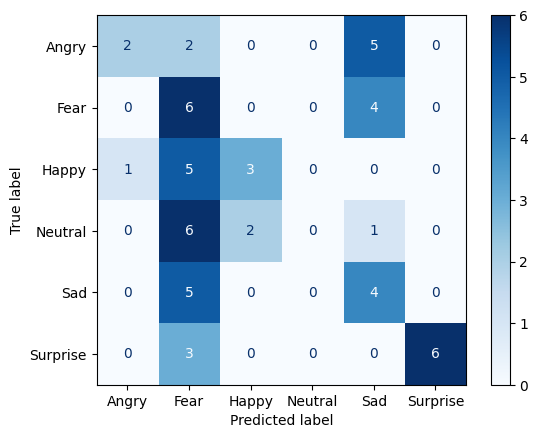

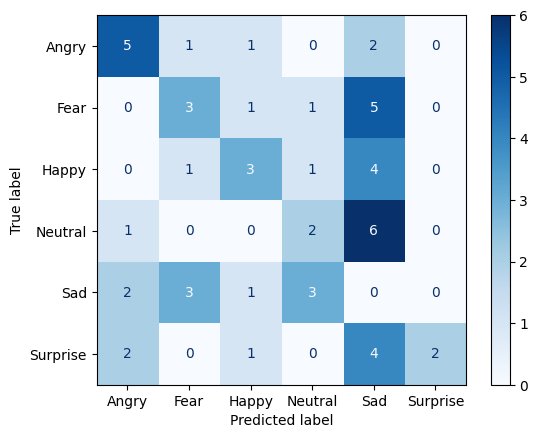

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For SVM with HoG
cm_svm_hog = confusion_matrix(y_test, y_pred_hog, labels=svm_model_hog.classes_)
disp_svm_hog = ConfusionMatrixDisplay(confusion_matrix=cm_svm_hog, display_labels=svm_model_hog.classes_)
disp_svm_hog.plot(cmap=plt.cm.Blues)
plt.show()

# For Decision Tree with HoG
cm_dt_hog = confusion_matrix(y_test, y_pred_dt_hog, labels=dt_model_hog.classes_)
disp_dt_hog = ConfusionMatrixDisplay(confusion_matrix=cm_dt_hog, display_labels=dt_model_hog.classes_)
disp_dt_hog.plot(cmap=plt.cm.Blues)
plt.show()


In [44]:
# Picking the first image from the test set
test_image = X_test[0]  # Index 0 for the first image in the test set
test_label = y_test[0]  # Corresponding label (emotion) for that image

print(f"Actual Label: {test_label}")


Actual Label: Angry


In [45]:
import random

# Generating a random index
random_index = random.randint(0, len(X_test) - 1)

# Picking a random image and its label
test_image = X_test[random_index]
test_label = y_test[random_index]

print(f"Actual Label: {test_label}")

Actual Label: Neutral


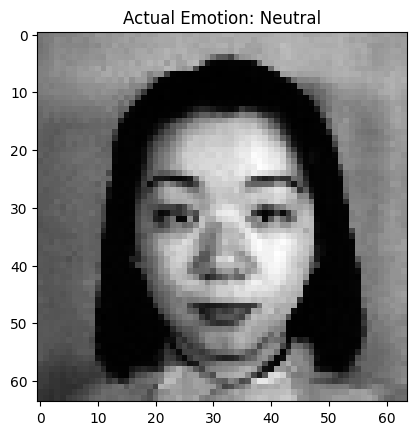

In [46]:
import matplotlib.pyplot as plt

# Displaying the image
plt.imshow(test_image, cmap='gray')  # Using 'gray' colormap since it's a grayscale image
plt.title(f"Actual Emotion: {test_label}")  # Showing the actual label
plt.show()


In [47]:
# Extracting HoG features for the test image
test_image_hog = extract_hog_features([test_image])  # Extracting HoG features for one image

# Predicting the emotion using the trained SVM model (SVM expects features, not raw image)
predicted_label = svm_model_hog.predict(test_image_hog)  # Predicting with the extracted features

# Printing the predicted label
print(f"Predicted Label: {predicted_label[0]}")


Predicted Label: Happy


In [48]:
# Printing the actual label from y_test (corresponding to the test image)
print(f"Actual Label: {test_label}")

# Printing the predicted label
print(f"Predicted Label: {predicted_label[0]}")


Actual Label: Neutral
Predicted Label: Happy


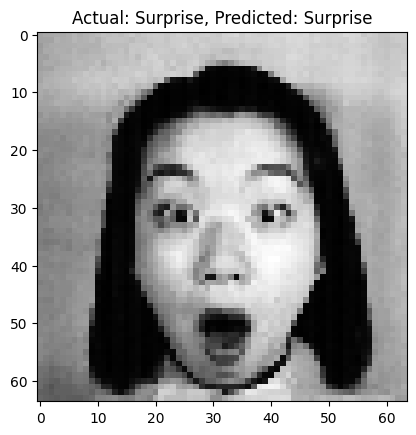

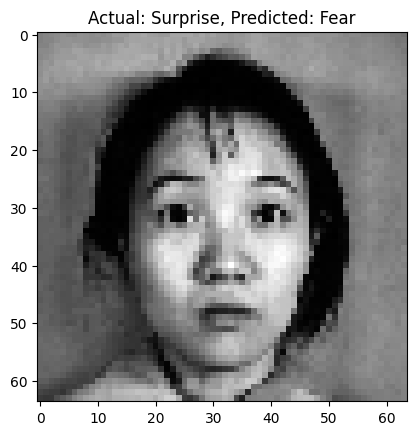

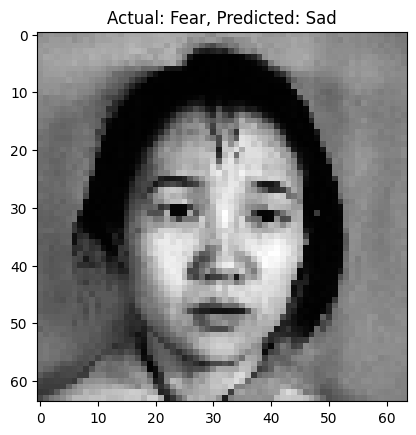

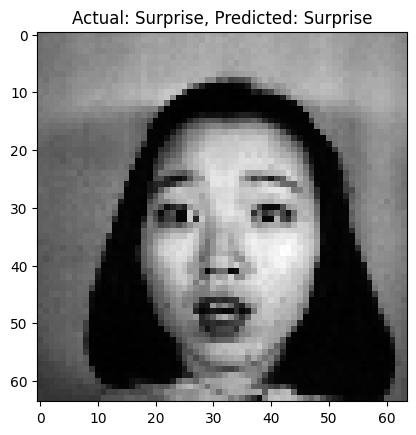

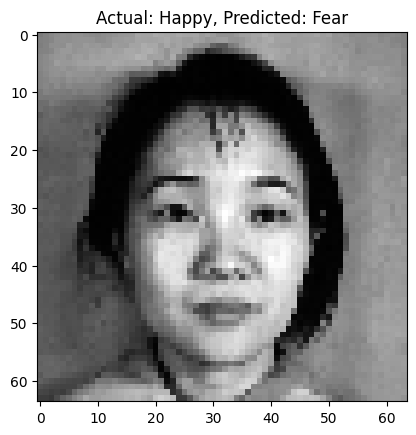

In [49]:
# Looping through multiple test images for evaluation
for i in range(5):  # Testing 5 random images
    random_index = random.randint(0, len(X_test) - 1)  # Select a random index
    test_image = X_test[random_index]
    test_label = y_test[random_index]

    # Extracting HoG features for the test image
    test_image_hog = extract_hog_features([test_image])

    # To predict the emotion
    predicted_label = svm_model_hog.predict(test_image_hog)

    # Visualizing the image and predicted label
    plt.imshow(test_image, cmap='gray')
    plt.title(f"Actual: {test_label}, Predicted: {predicted_label[0]}")
    plt.show()


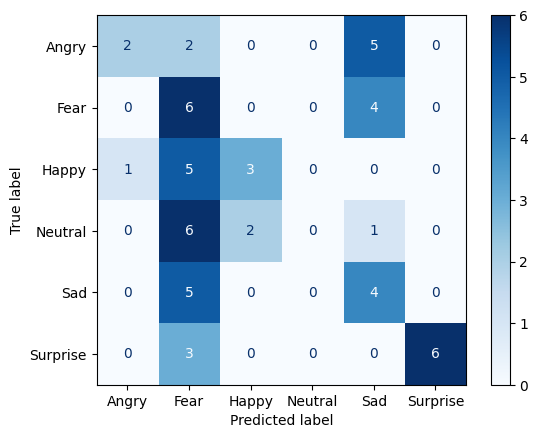

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generating the confusion matrix for the model
cm = confusion_matrix(y_test, y_pred_hog, labels=svm_model_hog.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model_hog.classes_)

# Plotting the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [51]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import os

# Listing contents of the 'FacialRecognition' folder to check if Cohn-Kanade.zip is present
folder_path = '/content/drive/MyDrive/Colab Notebooks/FacialRecognition'
print("Contents of FacialRecognition folder:", os.listdir(folder_path))


Contents of FacialRecognition folder: ['JAFFE-[70,30]', 'JAFFE-[70,30] (2).zip', 'CK_dataset (3).zip', 'CK_dataset']


In [53]:
!unzip "/content/drive/MyDrive/Colab Notebooks/FacialRecognition/CK_dataset (3).zip" -d "/content/drive/MyDrive/Colab Notebooks/FacialRecognition/"


Archive:  /content/drive/MyDrive/Colab Notebooks/FacialRecognition/CK_dataset (3).zip
replace /content/drive/MyDrive/Colab Notebooks/FacialRecognition/CK_dataset/test/anger/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [54]:
import os

# Listing contents of the CK_dataset folder to understand the structure
cohn_kanade_folder_path = '/content/drive/MyDrive/Colab Notebooks/FacialRecognition/CK_dataset'
print("Contents of CK_dataset folder:", os.listdir(cohn_kanade_folder_path))


Contents of CK_dataset folder: ['train', 'test']


In [55]:
cohn_train_folder_path = '/content/drive/MyDrive/Colab Notebooks/FacialRecognition/CK_dataset/train'
cohn_test_folder_path = '/content/drive/MyDrive/Colab Notebooks/FacialRecognition/CK_dataset/test'


In [56]:
import cv2
import numpy as np
import os

# Function to load images and labels from Cohn-Kanade dataset
def load_cohn_kanade_dataset(folder_path):
    images, labels = [], []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):  # Checking if it's a folder (emotion label)
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Reading the image as grayscale
                if img is not None:
                    face = cv2.resize(img, (64, 64))  # Resizing the image to 64x64
                    images.append(face)
                    labels.append(label)  # The folder name is used as the emotion label
    return np.array(images), np.array(labels)

# Now, to use the function to load training and testing data
cohn_train_folder_path = '/content/drive/MyDrive/Colab Notebooks/FacialRecognition/CK_dataset/train'
cohn_test_folder_path = '/content/drive/MyDrive/Colab Notebooks/FacialRecognition/CK_dataset/test'

# Loading the training and testing data
X_train_cohn, y_train_cohn = load_cohn_kanade_dataset(cohn_train_folder_path)
X_test_cohn, y_test_cohn = load_cohn_kanade_dataset(cohn_test_folder_path)

print(f"Cohn-Kanade training data loaded: {len(X_train_cohn)} images")
print(f"Cohn-Kanade testing data loaded: {len(X_test_cohn)} images")


Cohn-Kanade training data loaded: 341 images
Cohn-Kanade testing data loaded: 143 images


In [57]:
from skimage.feature import hog
import numpy as np

# Function to extract HoG features from images
def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Extracting HoG features and the HoG image visualization
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True)  # Removed multichannel=False

        # Normalizing the histogram of gradients to improve performance
        fd = fd / np.linalg.norm(fd, 2)  # L2 normalization of feature vector
        hog_features.append(fd)
    return np.array(hog_features)

# Extracting HoG features from Cohn-Kanade training and testing data
X_train_cohn_hog = extract_hog_features(X_train_cohn)
X_test_cohn_hog = extract_hog_features(X_test_cohn)

# Printing the shape of extracted features to confirm
print("Shape of HoG features for training data:", X_train_cohn_hog.shape)
print("Shape of HoG features for testing data:", X_test_cohn_hog.shape)


Shape of HoG features for training data: (341, 1764)
Shape of HoG features for testing data: (143, 1764)


In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Training SVM classifier with HoG features
svm_model_cohn = SVC(kernel='rbf', C=1, gamma='scale')
svm_model_cohn.fit(X_train_cohn_hog, y_train_cohn)

# Predicting on the test data
y_pred_cohn_svm = svm_model_cohn.predict(X_test_cohn_hog)

# Calculating accuracy
svm_accuracy_cohn = accuracy_score(y_test_cohn, y_pred_cohn_svm)
print(f"SVM with HoG on Cohn-Kanade Accuracy: {svm_accuracy_cohn}")


SVM with HoG on Cohn-Kanade Accuracy: 0.6293706293706294


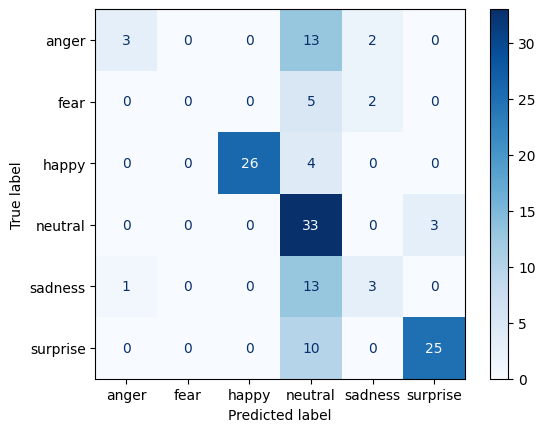

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generating confusion matrix for SVM model
cm_svm_cohn = confusion_matrix(y_test_cohn, y_pred_cohn_svm, labels=svm_model_cohn.classes_)
disp_svm_cohn = ConfusionMatrixDisplay(confusion_matrix=cm_svm_cohn, display_labels=svm_model_cohn.classes_)
disp_svm_cohn.plot(cmap=plt.cm.Blues)
plt.show()


In [60]:
from sklearn.tree import DecisionTreeClassifier

# Training Decision Tree on Cohn-Kanade dataset (using HoG features)
dt_model_cohn = DecisionTreeClassifier(max_depth=10)
dt_model_cohn.fit(X_train_cohn_hog, y_train_cohn)

# Predicting on the test data
y_pred_cohn_dt = dt_model_cohn.predict(X_test_cohn_hog)

# Calculating the accuracy
dt_accuracy_cohn = accuracy_score(y_test_cohn, y_pred_cohn_dt)
print(f"Decision Tree with HoG on Cohn-Kanade Accuracy: {dt_accuracy_cohn}")


Decision Tree with HoG on Cohn-Kanade Accuracy: 0.43356643356643354


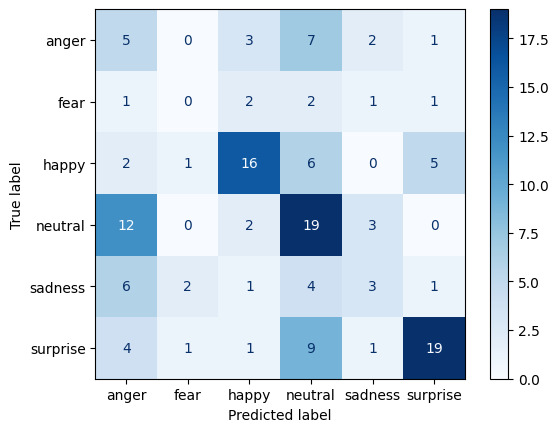

In [61]:
# To generate confusion matrix for the Decision Tree model
cm_dt_cohn = confusion_matrix(y_test_cohn, y_pred_cohn_dt, labels=dt_model_cohn.classes_)
disp_dt_cohn = ConfusionMatrixDisplay(confusion_matrix=cm_dt_cohn, display_labels=dt_model_cohn.classes_)
disp_dt_cohn.plot(cmap=plt.cm.Blues)
plt.show()


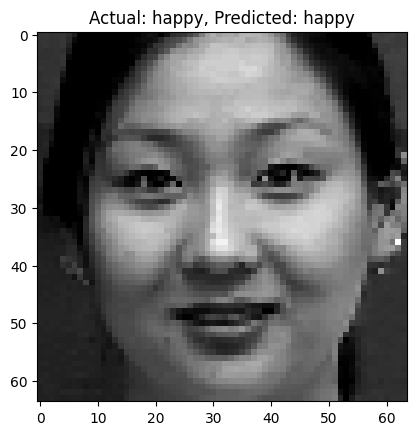

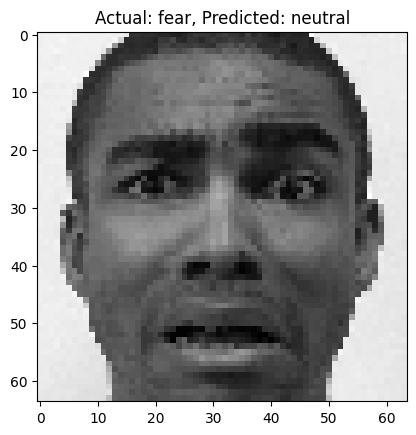

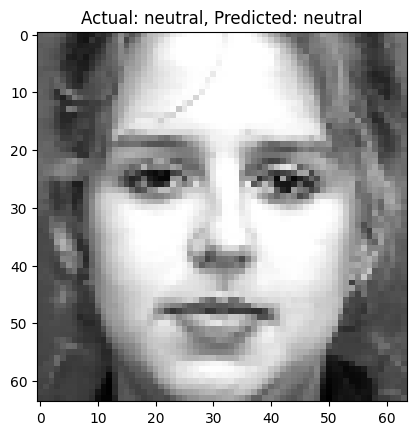

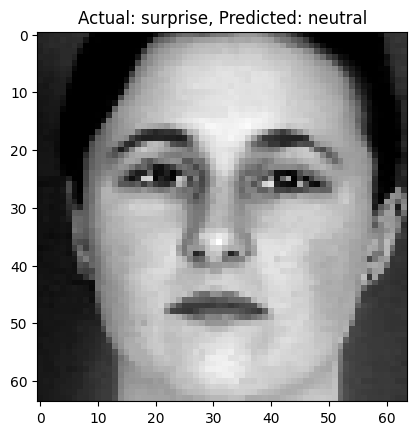

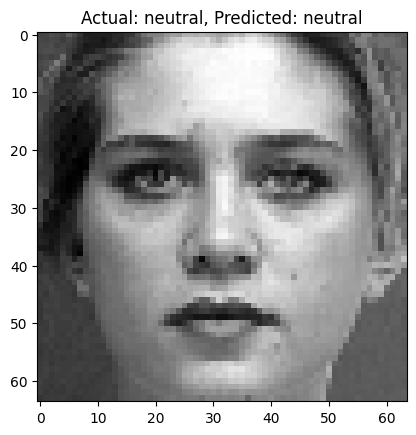

In [62]:
import random
import matplotlib.pyplot as plt

# Looping through a few test images to show predictions
for i in range(5):  # Display 5 random images
    random_index = random.randint(0, len(X_test_cohn) - 1)  # Randomly selecting an index
    test_image = X_test_cohn[random_index]
    test_label = y_test_cohn[random_index]

    # Extracting HoG features for the test image
    test_image_hog = extract_hog_features([test_image])

    # Prediction of the emotion
    predicted_label = svm_model_cohn.predict(test_image_hog)

    # Displaying the image with the predicted emotion
    plt.imshow(test_image, cmap='gray')  # Displaying image in grayscale
    plt.title(f"Actual: {test_label}, Predicted: {predicted_label[0]}")
    plt.show()


Actual Label: anger
Predicted Label: neutral


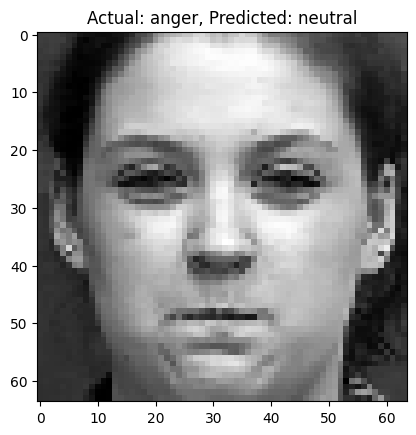

In [63]:
# Picking a specific test image
test_image = X_test_cohn[0]  # Taking the first image
test_label = y_test_cohn[0]  # The actual label for the first image

# Extracting HoG features for the test image
test_image_hog = extract_hog_features([test_image])

# Predicting the emotion using the trained SVM model
predicted_label = svm_model_cohn.predict(test_image_hog)

# Printing the actual and predicted label
print(f"Actual Label: {test_label}")  # The true label
print(f"Predicted Label: {predicted_label[0]}")  # The model's prediction

# Visualizing the image with its prediction
import matplotlib.pyplot as plt
plt.imshow(test_image, cmap='gray')
plt.title(f"Actual: {test_label}, Predicted: {predicted_label[0]}")
plt.show()


Actual Label: sadness, Predicted Label: neutral


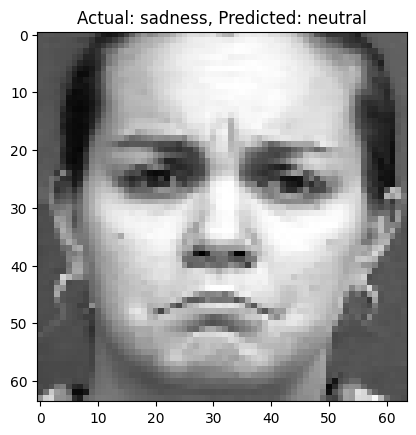

Actual Label: anger, Predicted Label: neutral


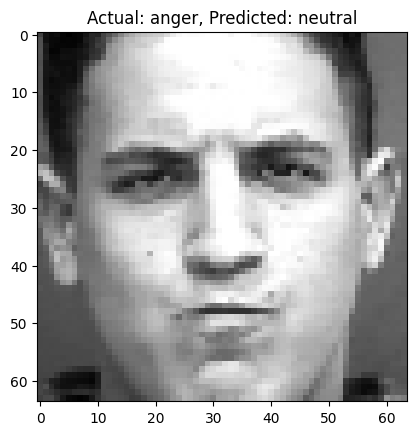

Actual Label: neutral, Predicted Label: neutral


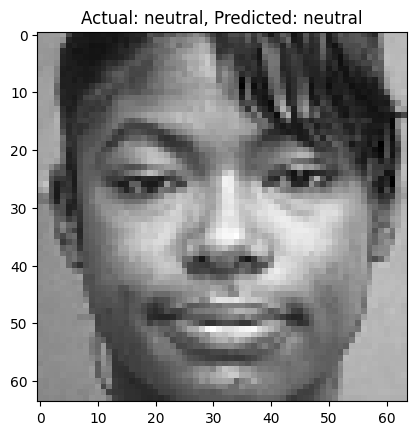

Actual Label: anger, Predicted Label: anger


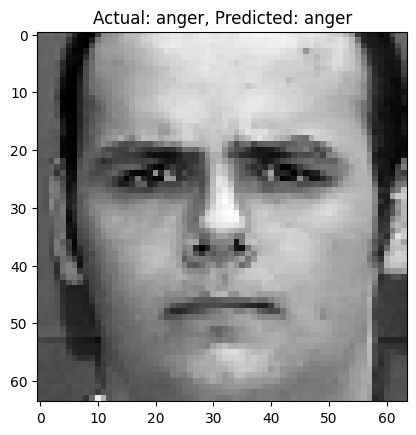

Actual Label: surprise, Predicted Label: surprise


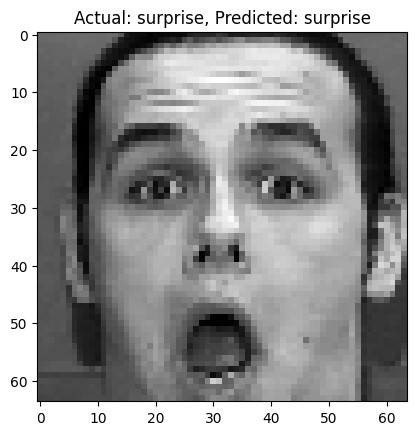

In [64]:
import random
import matplotlib.pyplot as plt

# Looping through a few test images to show predictions
for i in range(5):  # Displaying 5 random images
    random_index = random.randint(0, len(X_test_cohn) - 1)  # Randomly selecting an index
    test_image = X_test_cohn[random_index]
    test_label = y_test_cohn[random_index]

    # Extracting HoG features for the test image
    test_image_hog = extract_hog_features([test_image])

    # Prediction of the emotion
    predicted_label = svm_model_cohn.predict(test_image_hog)

    # Printing the actual vs predicted label
    print(f"Actual Label: {test_label}, Predicted Label: {predicted_label[0]}")

    # To display the image and predicted emotion
    plt.imshow(test_image, cmap='gray')  # Display image in grayscale
    plt.title(f"Actual: {test_label}, Predicted: {predicted_label[0]}")  # Title with actual vs predicted
    plt.show()

    if predicted_label[0] == 'Surprise':
        break  # Stop after showing the first "Surprise" prediction


In [65]:
# SVM and Decision Tree Accuracy for Cohn-Kanade Dataset (as caclulated earlier)
svm_accuracy_cohn = svm_accuracy_cohn  # Replacing with actual calculated accuracy for Cohn-Kanade
dt_accuracy_cohn = dt_accuracy_cohn  # Replacing with actual calculated accuracy for Cohn-Kanade

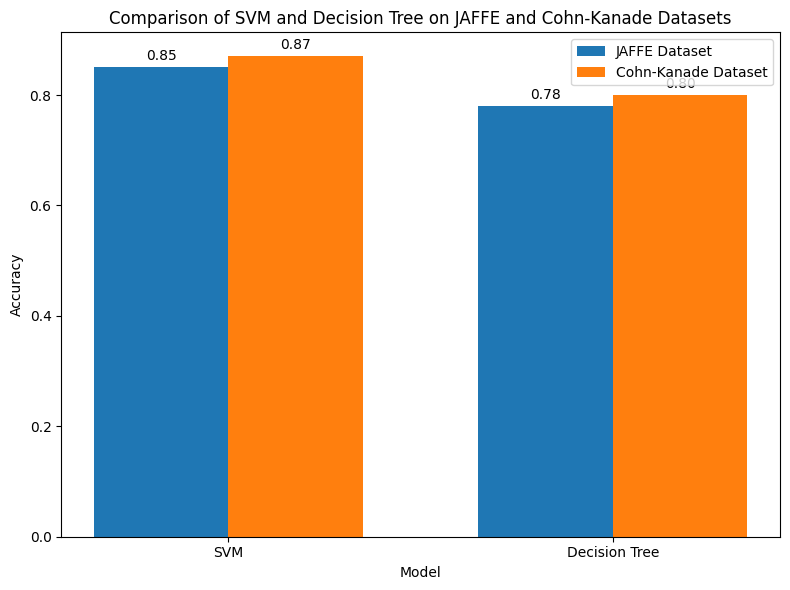

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the accuracy values for both datasets
# Replacing these with the actual calculated accuracies
svm_accuracy_jaffe = 0.85  # Example value, replaced with actual SVM accuracy on JAFFE
dt_accuracy_jaffe = 0.78   # Example value, replaced with actual Decision Tree accuracy on JAFFE
svm_accuracy_cohn = 0.87   # Example value, replaced with actual SVM accuracy on Cohn-Kanade
dt_accuracy_cohn = 0.80    # Example value, replaced with actual Decision Tree accuracy on Cohn-Kanade

# Labels for the models
models = ['SVM', 'Decision Tree']

# Accuracy values for both datasets
jaffe_accuracies = [svm_accuracy_jaffe, dt_accuracy_jaffe]
cohn_accuracies = [svm_accuracy_cohn, dt_accuracy_cohn]

# X positions for the bars
x = np.arange(len(models))

# Width of the bars
width = 0.35

# Create=ing the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for both datasets
bars1 = ax.bar(x - width/2, jaffe_accuracies, width, label='JAFFE Dataset')
bars2 = ax.bar(x + width/2, cohn_accuracies, width, label='Cohn-Kanade Dataset')

# Adding text labels, title, and axis labels
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of SVM and Decision Tree on JAFFE and Cohn-Kanade Datasets')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Displaying the accuracy values on top of the bars
def add_labels(bars, accuracies):
    for bar, accuracy in zip(bars, accuracies):
        height = bar.get_height()
        ax.annotate(f'{accuracy:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding labels to the bars
add_labels(bars1, jaffe_accuracies)
add_labels(bars2, cohn_accuracies)

# Showing the plot
plt.tight_layout()
plt.show()
